<a href="https://colab.research.google.com/github/vibeeshK/Snapchat-Project/blob/main/snapchat_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Snapchat Usage Analysis**
- Vibeesh Kamalakannan, Rasa Blourtchi, Raghav Arora

# **Introduction**
Our project focuses on analyzing daily user data from Snapchat for the years 2019 and 2020 in Norway, Denmark, and Sweden. All three countries, Norway, Sweden, and Denmark, implemented their first set of COVID-19 restrictions in March 2020, with measures introduced in the middle of the month.

The aim of our first task was to predict the average Snapchat usage during the last 10 days of the first quarter of 2020, taking into account the anomaly caused by the COVID-19 lockdown. To achieve this, we implemented an ARIMA model with an order of (1,1,1) that eliminates seasonality and yearly trends. By incorporating this model, we were able to make accurate predictions that account for the impact of the lockdown on Snapchat usage. We remove trends because we are trying to find the average usage throughout the quarter and not the daily trend.

Our next task was to predict the average Snapchat usage during the second quarter of 2020. To accomplish this, we utilized the same ARIMA model as before, but this time we trained it on data from weekends and holidays from 2019, December 2019, and the first quarter of 2020. Additionally, we incorporated our predictions from the first task to refine our predictions further. 

**Why 'APP_APPLICATION_OPEN_UU' is the best metric to track:**
The number of unique users using an app in a day is a good metric to track because it provides an indication of the popularity and reach of the app.The number of unique users can provide insight into how many people are actively using the app on a given day, which can be an indicator of user engagement. The more users engage with the app, the more likely they are to continue using it and recommending it to others. Additionally, Tracking the number of unique users over time can help app developers understand how the app is growing in popularity. An increase in the number of unique users over time suggests that the app is gaining more traction among users.

**Import Libraries**

In [141]:
import pandas as pd
import datetime
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt
from datetime import date, timedelta
import matplotlib.ticker as ticker
from datetime import date, timedelta
from statistics import mean
warnings.filterwarnings("ignore")

In [142]:
data = pd.read_csv('snap.csv')  

**Feature Engineering: Day of the week:**

In [143]:
from datetime import datetime

def get_day_of_week(date_str):
    date_formats = ["%m/%d/%y", "%m-%d-%y", "%m-%d-%Y", "%m/%d/%Y"]
    for date_format in date_formats:
        try:
            date_obj = datetime.strptime(date_str, date_format)
            break 
        except ValueError:
            pass 
    else:
        raise ValueError(f"Invalid date string: {date_str}")

    day_of_week = date_obj.weekday()
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    day_of_week_str = days[day_of_week]

    return (day_of_week_str)

dates = []
days = [] 
for i in data['event_date'].to_list():
    days.append(get_day_of_week(i)[0])
data['day'] = days
data =data.groupby(by='event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index()
data.head()

,event_date,APP_APPLICATION_OPEN_UU
0,01-01-2019,7012787
1,01-01-2020,7378613
2,01-02-2019,6522305
3,01-02-2020,6817444
4,01-03-2019,6457837


# **Question 1**
We changed the hyperparameter 'order' (1,1,1) so that we eliminate seasonality, trends from previous months. Thus, the lockdown is accounted for. We want the model to learn from the first day of March and learn the trend during the middle of March when Covid restrictions were implimented.

In [144]:
grouped_data =data.groupby(by='event_date')['APP_APPLICATION_OPEN_UU'].sum().reset_index()
grouped_data['event_date'] = pd.to_datetime(grouped_data['event_date'], infer_datetime_format=True).dt.date
grouped_data = grouped_data.sort_values(by='event_date', ascending=True)
data = grouped_data
 
# Model
model=ARIMA(data['APP_APPLICATION_OPEN_UU'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()   

pred1 = model_fit.predict(start=447 , end= 456).astype(float).astype(int)
first_q = pred1.mean()

print('Last 10 days of 1st quarter: ' +str(first_q) )

Last 10 days of 1st quarter: 7268630.4


**Merging Predictions with original dataset to visualize:**

In [145]:
def get_date_after(n):
    base_date = date(2020, 3, 21)
    target_date = base_date + timedelta(days=n)
    return target_date.isoformat()

data3 = pd.DataFrame(pred1)
dates = []
for i in range(1,11):
    dates.append(get_date_after(i))
data3['event_date'] = dates
#len(data3)
data3['APP_APPLICATION_OPEN_UU'] = data3['predicted_mean']
new_row = pd.DataFrame({'predicted_mean':7289909, 'event_date':'2020-03-21','APP_APPLICATION_OPEN_UU':7289909}, index =[0])
 
# Concatenate new_row with df
data3 = pd.concat([new_row, data3[:]]).reset_index(drop = True)
data3 = data3.drop(['predicted_mean'], axis=1)
data3

,event_date,APP_APPLICATION_OPEN_UU
0,2020-03-21,7289909
1,2020-03-22,7274803
2,2020-03-23,7271475
3,2020-03-24,7269503
4,2020-03-25,7268335
5,2020-03-26,7267643
6,2020-03-27,7267234
7,2020-03-28,7266991
8,2020-03-29,7266847
9,2020-03-30,7266762


**Visualizing Q1 of 2019 to Q1 of 2020**

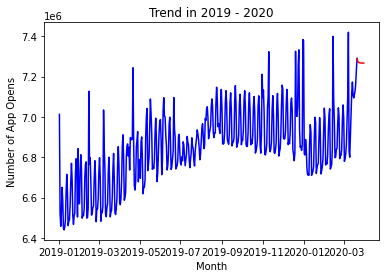

In [146]:
# Trend from 2019

plt.plot(data['event_date'], data['APP_APPLICATION_OPEN_UU'], color='blue')
plt.plot(pd.to_datetime(data3['event_date'].to_list()), data3['APP_APPLICATION_OPEN_UU'], color='red')
plt.ylabel('Number of App Opens')
plt.xlabel('Month')
plt.title('Trend in 2019 - 2020')
plt.show()

**Visualizing Q1**

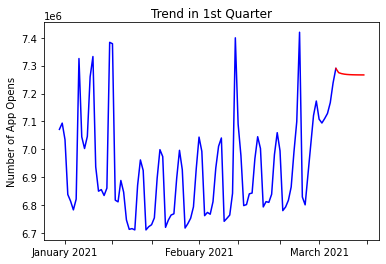

In [147]:
# Just 1st Quarter
fig, ax = plt.subplots()

ax.plot(data['event_date'].tail(100), data['APP_APPLICATION_OPEN_UU'].tail(100), color='blue')
ax.plot(pd.to_datetime(data3['event_date'].to_list()), data3['APP_APPLICATION_OPEN_UU'], color='red')

def format_ytick(value, _):
    return '1st quarter'

ax.set_xticklabels(['January 2021',' ','','Febuary 2021','','','March 2021']) 

plt.ylabel('Number of App Opens')

plt.title('Trend in 1st Quarter')

plt.show()

# **Question 2**

**Joining Quarter 1 predictions**

In [148]:
data = data.append(data3)
data = data[data.event_date != '2020-03-21']
data["event_date"] = data["event_date"].astype(str)
data["event_date"] = pd.to_datetime(data["event_date"])
data["day"] = data["event_date"].dt.day_name() 
data

,event_date,APP_APPLICATION_OPEN_UU,day
0,2019-01-01,7012787,Tuesday
2,2019-01-02,6522305,Wednesday
4,2019-01-03,6457837,Thursday
6,2019-01-04,6529505,Friday
8,2019-01-05,6650731,Saturday
...,...,...,...
6,2020-03-27,7267234,Friday
7,2020-03-28,7266991,Saturday
8,2020-03-29,7266847,Sunday
9,2020-03-30,7266762,Monday


**Filtering to include the month of december, the weekends and American public holidays in 2019 and the first quarter of 2020 (Including the predictions made for question 1)**

Holidays included:
New Year's Day, Maundy Thursday, Good Friday, Easter Monday, Labor Day, Ascension Day, White Monday, Christmas Eve, Christmas Day, Boxing Day, New Year's Eve

In [150]:
# Holidays
holidays = data[data['event_date'].isin(['2019-01-01','2019-04-18','2019-04-19','2019-04-22','2019-05-01','2019-05-30','2019-06-10','2019-12-24','2019-12-25','2019-12-26','2019-12-31'])]weekends = data[(data['day'] == 'Saturday') | (data['day'] == 'Sunday')] 

# December
data["event_date"] = pd.to_datetime(data["event_date"])
december = data[data["event_date"].dt.month == 12]
december = december[(december['day'] != 'Saturday')] 
december = december[(december['day'] != 'Sunday')] 
training = december.append(weekends)
training = training.append(holidays)
data3["event_date"] = pd.to_datetime(data3["event_date"])
data3["day"] = data3["event_date"].dt.day_name() 

training = training.append(data3) 
training = training.sort_values(by='event_date', ascending=True) 
training

,event_date,APP_APPLICATION_OPEN_UU,day
0,2019-01-01,7012787,Tuesday
8,2019-01-05,6650731,Saturday
10,2019-01-06,6582407,Sunday
22,2019-01-12,6715600,Saturday
144,2019-01-13,6629332,Sunday
...,...,...,...
7,2020-03-28,7266991,Saturday
8,2020-03-29,7266847,Sunday
8,2020-03-29,7266847,Sunday
9,2020-03-30,7266762,Monday


**Predictions for the 2nd Quarter**

In [151]:
# Model
model=ARIMA(training['APP_APPLICATION_OPEN_UU'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()   
pred2 = model_fit.predict(start=175 , end= 266).astype(float).astype(int)
second_q = pred2.mean()

print('2nd quarter: ' +str(second_q) )

2nd quarter: 7273120.739130435


**Merge Predictions with original dataset to visualize**

In [152]:
def get_date_after(n):
    base_date = date(2020, 3, 31)
    target_date = base_date + timedelta(days=n)
    return target_date.isoformat()

data4 = pd.DataFrame(pred2)
dates = []
for i in range(0,92):
    dates.append(get_date_after(i))
data4['event_date'] = dates
#len(data3)
data4['APP_APPLICATION_OPEN_UU'] = pred2
new_row = pd.DataFrame({ 'predicted_mean':7266711, 'event_date':'2020-03-31','APP_APPLICATION_OPEN_UU':7266711}, index =[0])
 
# Concatenate new_row with df
data4 = pd.concat([new_row, data4[:]]).reset_index(drop = True)
data4 = data4.drop(['predicted_mean'], axis=1)
data4

,event_date,APP_APPLICATION_OPEN_UU
0,2020-03-31,7266711
1,2020-03-31,7265892
2,2020-04-01,7280311
3,2020-04-02,7266088
4,2020-04-03,7280112
...,...,...
88,2020-06-26,7275281
89,2020-06-27,7271048
90,2020-06-28,7275222
91,2020-06-29,7271106


**Visualization Q2:**

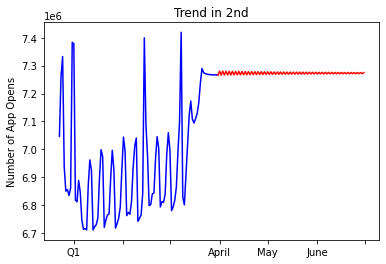

In [153]:
# 2nd Quarter Predictions
fig, ax = plt.subplots()

ax.plot(data['event_date'].tail(100), data['APP_APPLICATION_OPEN_UU'].tail(100), color='blue')

# Create a line chart for df2
ax.plot(pd.to_datetime(data4['event_date'].to_list()), data4['APP_APPLICATION_OPEN_UU'], color='red')

#ax.set_xticklabels(['1st Quarter'])

def format_ytick(value, _):
    return '1st quarter'

ax.set_xticklabels(['Q1',' ','','April','May','June'])

plt.ylabel('Number of App Opens')

# Set chart title
plt.title('Trend in 2nd')
plt.show()

# **Why we think our model is accurate**

**Increase rate in snapchat usage from the fourth quarter in 2019 to second quarter in 2020**

Increase rate = new value / (old value + new value)

In [176]:
nineteen = grouped_data[273:-81] 
avg_users1 = mean(nineteen['APP_APPLICATION_OPEN_UU']) 
avg_users1

6969846.260869565

In [177]:
model=ARIMA(training['APP_APPLICATION_OPEN_UU'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()   
pred2 = model_fit.predict(start=175 , end= 266).astype(float).astype(int)
avg_users2 = pred2.mean()
avg_users2 

7273120.739130435

In [178]:
# Increase in snapchat opens from 2019 Q4 to 2020 Q1
incease_rate = ((avg_users2-avg_users1) / avg_users2) * 100
incease_rate = round(incease_rate, 2)
print('Predicted increase in snapchat opens from Q4 (2019) to Q1 (2020): ' + str(incease_rate)+ '%')

Predicted increase in snapchat opens from Q4 (2019) to Q1 (2020): 4.17%


**Rate of increase in snapchat users from the fourth quarter in 2019 to second quarter in 2020 (world data)**

https://backlinko.com/snapchat-users

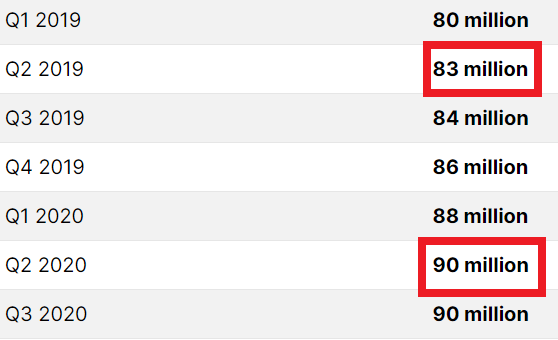

In [169]:
increase_rate2 =  (90-86)/86
increase_rate2 = round(increase_rate2, 2)*100
print('Increase in snapchat users from Q4 (2019) to Q1 (2020): ' + str(increase_rate2) + '%')

Increase in snapchat users from Q4 (2019) to Q1 (2020): 5.0%


# **Conclusion:**

Based on our analysis, we were able to predict that the average daily unique users for the three countries in the **end of Q1 would be 7,268,630** and in **Q2 would be 7,273,120**. Our analysis revealed that the predicted increase in usage rate for the selected three countries from Q4 of 2019 to Q2 of 2020 (4.17%) was similar to the increase rate of Snapchat users globally during the same period (5%). This finding suggests that the usage trends in these countries were in line with the global trends, and the predictions we made using our model were reasonably accurate. However, it is important to note that this does not directly confirm the performance of our model, as there may be other factors influencing the trends that were not accounted for in our analysis. Nonetheless, this comparison provides valuable insight into how the usage of these countries compares to global trends.